In [542]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

np.random.seed(29)

#### 1 / How likely is it that you roll doubles when rolling two dice?


In [2]:

n_trials = nrows = 1_0000

n_dice = ncols = 2
# represents number of dice rolled

# using random choice to select from provided-below list. Reshape into columns.
rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(nrows, ncols)
rolls

array([[6, 4],
       [5, 6],
       [3, 1],
       ...,
       [2, 5],
       [1, 4],
       [4, 6]])

In [3]:
chancey = (pd.DataFrame(rolls)
        .apply(lambda row: row[0] == row[1], axis=1)
        .mean())

chancey

# The lambda does : for each row, check if the digit in the 1st index equals the digit in the 2nd index

0.1709

In [495]:
## IN-CLASS EXAMPLE

n_simulations = 100_000

6/36

n_dice = 2

outcomes = [1,2,3,4,5,6]

rolls = np.random.choice(outcomes, size = (n_simulations, n_dice))
rolls

array([[1, 1],
       [1, 4],
       [2, 6],
       ...,
       [2, 4],
       [5, 2],
       [1, 4]])

In [496]:
# turn into a dataframe

rolls = pd.DataFrame(rolls)
rolls.head()

,0,1
0,1,1
1,1,4
2,2,6
3,3,5
4,3,1


In [497]:
# probability of index 0 equalling index 1

(rolls[0] == rolls[1]).mean()

0.16504

### 2 / If you flip 8 coins, what is the probability of getting exactly 3 heads?  What is the probability of getting more than 3 heads?


In [18]:
n_trials = nrows = 1500
n_coins = ncols = 8
H = 0
T = 1


In [19]:
flips = np.random.choice([0, 1], n_trials * n_coins).reshape(nrows, ncols)
flips


array([[1, 1, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [20]:
# computing the sum of each roll (event)

sums_of_flips = flips.sum(axis = 1)

# return the array of each sum
sums_of_flips

array([7, 3, 1, ..., 1, 3, 4])

In [21]:
three_heads = sums_of_flips == 3
three_heads

array([False,  True, False, ..., False,  True, False])

In [22]:
# probability of flipping a head exactly 3 times

prob3H = three_heads.astype(int).mean()
round(prob3H, 4)

0.2367

In [23]:
more_than_3H = sums_of_flips > 3
more_than_3H

array([ True, False, False, ..., False, False,  True])

In [24]:
# probability of flipping a head more than 3 times

prob_more_than_3H = more_than_3H.astype(int).mean()
round(prob_more_than_3H, 4)

0.6287

#### IN-CLASS ALTERNATIVE


In [500]:


n_coins = 8
outcomes = ['H', 'T']


In [501]:
coinflips = np.random.choice(outcomes, size = (n_simulations, n_coins))
coinflips

array([['T', 'T', 'T', ..., 'H', 'T', 'H'],
       ['T', 'T', 'H', ..., 'H', 'T', 'T'],
       ['H', 'H', 'H', ..., 'T', 'T', 'H'],
       ...,
       ['H', 'T', 'H', ..., 'H', 'T', 'H'],
       ['T', 'H', 'T', ..., 'T', 'T', 'T'],
       ['H', 'T', 'T', ..., 'T', 'T', 'H']], dtype='<U1')

In [504]:
flips_simulation = (coinflips == 'H').sum(axis = 1)
flips_simulation

# gives array of Heads

array([4, 2, 6, ..., 4, 3, 4])

In [505]:
(flips_simulation > 3).mean()

# 63 % of time land on heads

0.63733

In [506]:
# exactly 3 times

(flips_simulation == 3).mean()

0.21887

### 3 / There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. 
   Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards past  
   which I drive both have data science students on them ?

In [25]:
p_ds_student = 0.25

# two columns : two billboards
nbillboards = ncols = 2


n_simulated_bboards = nrows = 10 ** 5

In [26]:
data = np.random.random((nrows, ncols))
data

array([[0.41820153, 0.29990922],
       [0.20916944, 0.11640794],
       [0.54840772, 0.71256627],
       ...,
       [0.80487589, 0.76123784],
       [0.18811986, 0.55489077],
       [0.7066491 , 0.4863494 ]])

In [27]:
# how many ds billboards occured, using the generated, random value ?

ds_student = data < p_ds_student
ds_student

array([[False, False],
       [ True,  True],
       [False, False],
       ...,
       [False, False],
       [ True, False],
       [False, False]])

In [28]:
# returns the probability of passing billboards with a ds student

data_face = ds_student.astype(int).mean()
data_face

0.25022

In [29]:
data_face.sum()

0.25022

In [30]:
# probability of two billboards with a data science student on each

(ds_student.sum(axis = 1) == 2).mean()

0.06208

#### IN-CLASS ALTERNATIVE

In [507]:


outcomesbb = ['wd', 'wd', 'wd', 'ds']

n_billboards = 2

billboards = np.random.choice(outcomesbb, size = (n_simulations, n_billboards))
billboards

# gives an array of likely outcomes for ds on a billboard

array([['wd', 'wd'],
       ['ds', 'wd'],
       ['wd', 'ds'],
       ...,
       ['wd', 'ds'],
       ['wd', 'ds'],
       ['wd', 'wd']], dtype='<U2')

In [517]:
outcomesbb = ['wd', 'ds']

billboards = np.random.choice(outcomesbb, size = (n_simulations, n_billboards), p = [0.75, 0.25])
billboards

array([['wd', 'wd'],
       ['wd', 'ds'],
       ['wd', 'wd'],
       ...,
       ['wd', 'wd'],
       ['ds', 'wd'],
       ['ds', 'wd']], dtype='<U2')

In [518]:
(billboards == 'ds').sum(axis = 1)

array([0, 1, 0, ..., 0, 1, 1])

In [520]:
prob = ((billboards == 'ds').sum(axis = 1) == 2).mean()
prob

0.06183

###  4 / Codeup students buy, daily, on average, a total of 3 poptart packages, with a standard deviation of 1.5 a day, from the snack vending machine.  
If, on Monday, the machine is restocked with 17 poptart packages, how likely is it that a person will be able to buy some poptarts on Friday afternoon?   

(Remember, if you have the mean and the standard deviation, use the np.random.normal .) You'll need to make a judgement call on how to handle some of your values.

In [110]:
n_poptarts = nrows = 17
# represents no of poptart packages on Monday

n_sold = ncols = 3
# represents number of poptart packages sold on a given day


vending = np.random.normal(loc = 3, scale = 1.5, size = (1000, 5))
# loc = mean
# scale = std dev
# size = size of ouputted array

vending
# outputs number of poptart packages sold each day

array([[5.36259664, 1.23673974, 3.37991183, 3.08032112, 3.36390589],
       [3.11149639, 5.15813056, 3.86114733, 5.40813526, 4.81054233],
       [1.89602475, 5.2050109 , 5.3155558 , 1.33187415, 4.09746776],
       ...,
       [4.7900203 , 2.45205997, 0.30227492, 1.15926565, 1.77429577],
       [3.69955426, 4.97744923, 5.89687198, 4.55791576, 2.26167456],
       [3.2755019 , 4.09271626, 8.32994058, 2.05381282, 1.84750609]])

In [65]:
vending.sum()

# total number sold in 1000 days

15044.046617656048

In [67]:
vending.sum(axis = 0)

# sum of each column

array([2968.33105302, 3048.95589703, 3087.80274734, 2878.07283183,
       3060.88408844])

In [121]:
print(vending.sum(axis = 1))
# summing the total of each row

print('.')

#checking that there are 1000 entries
print(len(vending))


[16.42347521 22.34945187 17.84593335 14.98885387 17.48321515 13.70772303
 23.24462813 14.94956034 15.68114407 14.47052163 15.19780227 17.08627335
 17.48820815 17.02137206 16.67485813 20.04724947 15.6527331  20.11828171
 12.16837779 13.06434121 16.4148255  18.7285309  16.068892   15.56601549
 19.60439084 18.33733031 16.92215862 22.74694054 12.39996297 14.2297326
 12.56110947 11.31611865 10.87759628 14.16514805 12.9913791  15.18977827
 19.44156849 17.58529197 16.32493788 15.84592059 17.62814355 22.00714697
 16.51105462 19.38150501 15.89729728 12.38256177 16.71410113 19.14545226
 13.1996717  15.95309505 19.44213611 19.07834793 14.85276822 14.35585273
 14.96419013 15.05188471 11.16358683  9.12829689  9.75046393 19.88434685
 17.49164473 16.57631013 16.8657028  15.40365218 15.5591031  14.25624052
 12.0014163   9.63418737 10.66490245 16.65897665  8.43580663 13.02922229
 14.32693724 16.24165436 15.36172882 15.31084824 15.17325793 14.50233165
 14.77606639 13.74462472 18.268577    9.2458119  15.

In [72]:
Thousand_days_of_Poptarts = vending.sum(axis = 1)
Thousand_days_of_Poptarts

array([17.92580487, 16.49177106, 16.31715049, 16.52422211, 12.88376954,
       14.8252568 , 16.82198344, 21.22413546, 10.06945185, 12.03864101,
       13.64018881, 17.07624721, 17.63925629, 13.04253935, 19.75967811,
       13.46691285, 17.02896068, 15.79121109, 16.48770953, 10.27944866,
       10.45344807, 16.16884504, 15.55295198, 18.89799128, 16.66911817,
       18.61816169, 12.09331892, 15.10103058, 19.05237285, 18.08009313,
       21.48050642, 12.27174336, 19.5040134 , 18.49106975, 10.96742537,
       16.16826919, 14.28809838, 16.02137191, 15.49235264,  9.90553065,
       18.44342873, 12.26631471, 12.74293411, 14.42193827, 11.55258359,
       12.84434295, 13.58635878, 21.44503493, 16.01603277, 16.78706091,
       19.6413093 , 15.13099308, 15.74578738, 22.52828096, 10.31517377,
        8.34296288, 15.45113133, 12.67171815, 18.0015165 , 14.66313846,
       19.00246379, 13.57796184, 17.02156344, 12.68929594, 10.00207664,
       20.47707375, 13.55128334, 12.98480541, 10.00405548, 19.17

In [73]:
Thousand_days_of_Poptarts < 17
# True = poptarts remaining on Friday

array([ True, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,

In [78]:
leftover = sum(Thousand_days_of_Poptarts < 17)
leftover
# returns number of poptarts left when sold for 1000 days.


721

In [79]:
not_leftover = leftover / 1000
not_leftover

0.721

#### IN-CLASS ALTERNATIVE

In [522]:
mean = 3
sd = 1.5
n_days = 5

In [530]:
popt_per_day = np.random.normal(mean, sd, size = (n_simulations, n_days))
popt_per_day

array([[ 2.37377681,  4.05904814,  5.87397705, -0.21263324,  4.07858534],
       [ 3.70060892,  4.1500838 ,  4.32301417,  4.21312599,  1.57925273],
       [ 2.80644235,  2.05370934,  0.84236575,  3.97830742,  4.47741841],
       ...,
       [ 2.88421199,  5.23904934,  0.95479155,  2.93098302,  4.56863697],
       [ 4.12888159,  2.44640886,  0.90799274,  4.24588037,  2.13194317],
       [ 3.61665708,  3.63303577,  3.79536054,  4.45284286,  4.65287658]])

(array([[9.0000e+00, 2.9500e+02, 3.3710e+03, 1.6771e+04, 3.5033e+04,
         3.1055e+04, 1.1611e+04, 1.7360e+03, 1.1800e+02, 1.0000e+00],
        [1.2000e+01, 2.5400e+02, 3.3740e+03, 1.6501e+04, 3.5130e+04,
         3.1181e+04, 1.1526e+04, 1.8970e+03, 1.2100e+02, 4.0000e+00],
        [1.0000e+01, 2.5200e+02, 3.3950e+03, 1.6433e+04, 3.4991e+04,
         3.1251e+04, 1.1734e+04, 1.8230e+03, 1.0500e+02, 6.0000e+00],
        [8.0000e+00, 2.5300e+02, 3.4650e+03, 1.6650e+04, 3.4944e+04,
         3.1111e+04, 1.1633e+04, 1.8210e+03, 1.1300e+02, 2.0000e+00],
        [6.0000e+00, 2.8600e+02, 3.4520e+03, 1.6699e+04, 3.4876e+04,
         3.1075e+04, 1.1684e+04, 1.8020e+03, 1.1600e+02, 4.0000e+00]]),
 array([-4.02359211, -2.57756899, -1.13154586,  0.31447727,  1.76050039,
         3.20652352,  4.65254665,  6.09856978,  7.5445929 ,  8.99061603,
        10.43663916]),
 <a list of 5 BarContainer objects>)

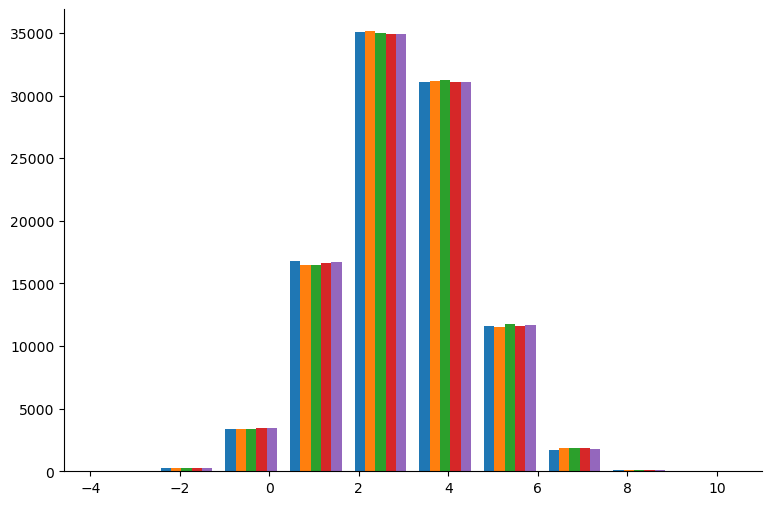

In [543]:
plt.hist(np.random.normal(mean, sd, size = (n_simulations, n_days)))


In [536]:
poptarts_per_week = popt_per_day.sum(axis = 1)
poptarts_per_week

array([16.1727541 , 17.96608561, 14.15824326, ..., 16.57767287,
       13.86110673, 20.15077284])

In [538]:
(poptarts_per_week <= 16).mean()

0.6131

### 5 / Compare Heights

    Men have an average height of 178 cm, with a standard deviation of 8 cm.  
    Women have a mean height of 170 cm, sd = 6 cm.  
    Since you have means and standard deviations, you can use np.random.normal to generate observations.  
    If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?  



In [115]:
menheight = np.random.normal(loc = 178, scale = 8, size = (10000, 1))

menheight.max()

210.0217343154357

In [114]:
womenheight = np.random.normal(loc = 170, scale = 6, size = (10000, 1))

womenheight.max()


195.70852223700942

In [116]:
comparing_heights = menheight < womenheight
comparing_heights

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [117]:
women_taller_than_men = comparing_heights.sum()
women_taller_than_men

2160

In [118]:
p_women_taller_than_men = women_taller_than_men / 1000
p_women_taller_than_men

2.16

#### IN-CLASS ALTERNATIVE

In [545]:
men_avg = 178
men_std = 8


In [546]:
women_avg = 170
women_std = 6

In [547]:
height_men = np.random.normal(men_avg, men_std, n_simulations)

In [548]:
height_women = np.random.normal(women_avg, women_std, n_simulations)

In [549]:
(height_women > height_men).mean()

0.21354

### 6 / When installing Anaconda on a student's computer, there's a 1-in-250 chance that the download is corrupted and the installation fails. 
a / What are the odds that, after having 50 students download Anaconda, no one has an installation issue?   
b / 100 students?  
c / What is the probability that we observe an installation issue within the first 150 students that download anaconda?  
d / How likely is it that 450 students all download anaconda without an issue?

In [421]:
success = np.random.choice([0, 1], size = (10_000, 50), p = (.004, .996))
success

# python picks random 0 and 1 according to the p = ().

 # 0 is a failure
    # 1 is a success
    

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [430]:
success.sum(axis = 1)


array([50, 50, 49, ..., 50, 50, 50])

In [431]:
(success.sum(axis = 1) == 50)

# returns an array of boolean values

array([ True,  True, False, ...,  True,  True,  True])

In [432]:
(success.sum(axis = 1) == 50).mean()

# probability of full success in a group of 50

0.8233

#### IN-CLASS ALTERNATIVE A

In [551]:
outcomes = ['S', 'F']
n_students = 50


In [552]:
downloads = np.random.choice(outcomes, size = (n_simulations, n_students), p = [249/250, 1/250])
downloads

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S']], dtype='<U1')

In [554]:
(downloads == 'S').sum(axis = 1)

array([50, 50, 50, ..., 50, 50, 50])

In [556]:
((downloads == 'S').sum(axis = 1) == 50).mean()

0.81797

In [428]:
# b /

success100 = np.random.choice([0, 1], size = (10_000, 100), p = (.004, .996))
success100

success100.sum(axis = 1)



array([ 99, 100, 100, ..., 100,  98, 100])

In [429]:
(success100.sum(axis = 1) == 100).mean()

# probability of full success in a group of 100

0.6734

In [433]:
# c /

success150 = np.random.choice([0, 1], size = (10_000, 150), p = (.004, .996))
success150

success150.sum(axis = 1)

array([150, 148, 148, ..., 148, 149, 149])

In [435]:
success150 = (success150.sum(axis = 1) == 150).mean()
success150

# probability of full success in a group of 150

0.5538

In [438]:
failure_in_150 = (1 - success150)
failure_in_150

0.44620000000000004

#### IN-CLASS ALTERNATIVE, C

In [561]:
outcomes = ['S', 'F']
n_students = 150

downloads = np.random.choice(outcomes, size = (n_simulations, n_students),  p = [249/250, 1/250])
downloads

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S']], dtype='<U1')

In [562]:
((downloads == 'S').sum(axis = 1) < n_students).mean()


0.44973

In [441]:
# d / How likely is it that 450 students all download anaconda without an issue?

success450 = np.random.choice([0, 1], size = (10_000, 450), p = (.004, .996))
success450

success450.sum(axis = 1)

array([449, 449, 449, ..., 449, 449, 448])

In [442]:
success450 = (success450.sum(axis = 1) == 450).mean()
success450

# probability of 450 students downloading without isseu

0.1664

#### IN-CLASS ALTERNATIVE, D

In [609]:
outcomes = ['S', 'F']
n_studentsd = 450

downloads = np.random.choice(outcomes, size = (n_simulations, n_studentsd),  p = [249/250, 1/250])
downloads

1 - ((downloads == 'S').sum(axis = 1) < n_studentsd).mean()


0.16471000000000002

### 7 / There's a 70% chance on any given day that there will be at least one food truck at Travis Park.   

However, you haven't seen a food truck there in 3 days. How unlikely is this?

How likely is it that a food truck will show up sometime this week?


In [459]:
# probability that there will not be a foodtruck in Travis Park pendant 3 jours

p_foodtruck_in_park = 0.70


foodtruck_in_park = np.random.choice([0,1], size = [10_000, 3], p = [0.30, 0.70])
foodtruck_in_park

array([[0, 1, 0],
       [1, 1, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [460]:
foodtruck_in_park.sum(axis = 1)

array([1, 3, 1, ..., 1, 3, 3])

In [461]:
foodtruck_in_park = foodtruck_in_park.sum(axis = 1)
foodtruck_in_park

array([1, 3, 1, ..., 1, 3, 3])

In [462]:
foodtruck_in_park < 3


array([ True, False,  True, ...,  True, False, False])

In [464]:
pfoodtruck_in_park = sum(foodtruck_in_park < 3)
pfoodtruck_in_park

6588.0

In [465]:
pfoodtruck_in_park / (10000 * 3)

# probability that there will not be a foodtruck in Travis Park pendant 3 jours

0.2196

#### IN-CLASS ALTERNATIVE, 7a (correct way)

In [571]:
# 0 = NO TRUCK, 1 = TRUCK/S PRESENT
n_days = 3

trucks = np.random.choice([0,1], size = (n_simulations, n_days), p = [0.3, 0.7])
trucks

array([[1, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       ...,
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [568]:
(trucks.sum(axis = 1) == 0).mean()

# probability of no truck showing up.

0.02689

#### 7 b //

In [597]:
# 7 b //

foodtruck_in_park7 = np.random.choice([0,1], size = [10_000, 7], p = [0.30, 0.70])
foodtruck_in_park7

foodtruck_in_park7.sum(axis = 1)
foodtruck_in_park < 1

array([False, False, False, ..., False, False, False])

In [598]:
pfoodtruck_in_park7 = sum(foodtruck_in_park7 < 1)
pfoodtruck_in_park7

pnot = pfoodtruck_in_park7 / (10000 * 7)
pnot


array([0.0419    , 0.04231429, 0.04281429, 0.04285714, 0.04278571,
       0.04215714, 0.04367143])

In [599]:
#probability of food truck in Travis Park pendant au moins 1 jour chaque semaine
p_in_park_in_a_week = (1 - pnot).mean()
p_in_park_in_a_week

0.9573571428571429

#### IN-CLASS ALTERNATIVE, 7b (correct way)

In [595]:
# 0 = NO TRUCK, 1 = TRUCK/S PRESENT
n_days = 3

trucks = np.random.choice([0,1], size = (n_simulations, n_days), p = [0.3, 0.7])
trucks

array([[0, 0, 1],
       [1, 1, 1],
       [0, 1, 1],
       ...,
       [1, 1, 0],
       [1, 0, 0],
       [0, 1, 1]])

In [596]:
(trucks.sum(axis = 1) >= 1).mean()

0.97261

### 8 / If 23 people are in the same room, what are the odds that two of them share a birthday? 

What if it's 20 people?  
What if there are 40 people ?

In [487]:
p_same_bday = 2/365
p_same_bday 



0.005479452054794521

In [489]:
np.random.choice([0,1], size = [1000, 365], p = [0.9945, 0.0055])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### in-class continuation

In [576]:
outcomes = range(1,366)
n_studentsbd = 23


In [577]:
birthdays = np.random.choice(outcomes, size = (n_simulations, n_studentsbd))

In [582]:
birthdays = pd.DataFrame(birthdays)
birthdays.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,231,95,105,107,83,11,9,279,363,268,...,92,117,244,320,333,211,221,124,262,161
1,73,4,173,266,240,251,21,10,136,201,...,301,264,322,176,70,73,137,153,331,145
2,256,348,178,90,268,15,78,166,178,83,...,72,85,126,200,233,292,192,259,207,61
3,231,342,66,166,247,182,172,155,328,284,...,152,157,190,248,46,132,61,238,40,14
4,341,170,191,316,158,237,244,331,171,273,...,51,296,133,338,277,356,359,316,2,168


In [590]:
(birthdays.nunique(axis = 1) < 23).mean()

0.50776

In [592]:
## if 20 students per class

outcomes = range(1,366)
n_students20 = 40

birthdays = np.random.choice(outcomes, size = (n_simulations, n_students20))

birthdays = pd.DataFrame(birthdays)
birthdays.head()

(birthdays.nunique(axis = 1) < 40).mean()

0.89101